Mounted at /content/drive


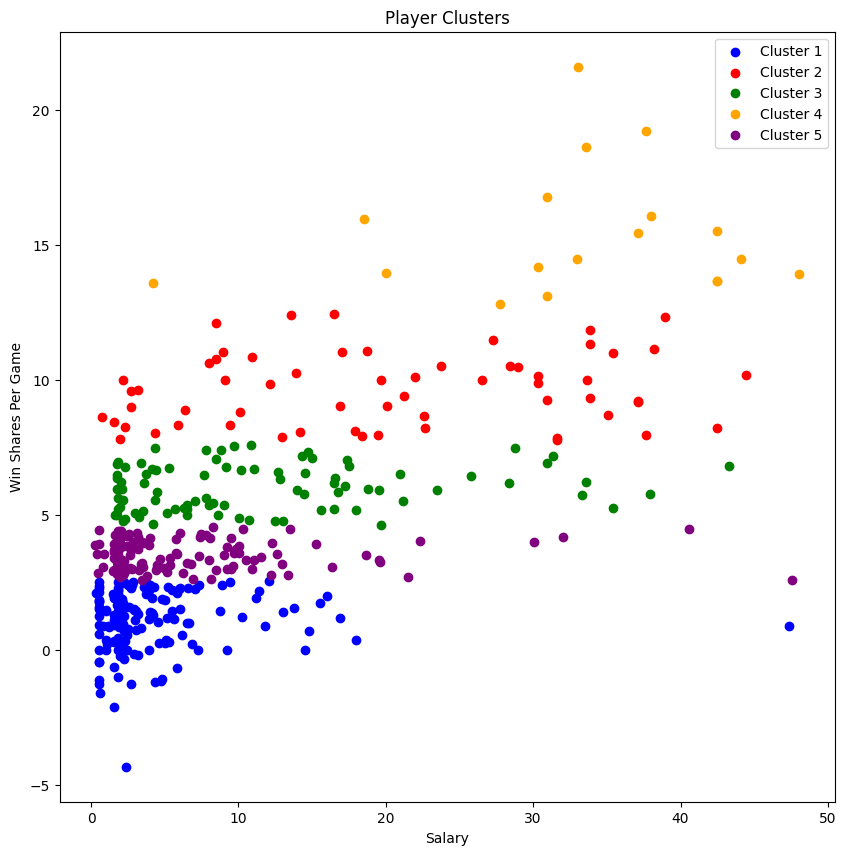

Cluster 1:
                   Player     Salary  Win Shares Per Game
358         Terrence Ross  12.080373             2.539683
25        Dominick Barlow   0.508910             2.500000
51        Christian Braun   2.808600             2.500000
350         Austin Rivers   1.836090             2.500000
192          Bones Hyland   2.201520             2.500000
..                    ...        ...                  ...
109             PJ Dozier   0.539450            -1.250000
209          Keon Johnson   2.681040            -1.250000
419  Duane Washington Jr.   0.628802            -1.612903
306           Daishen Nix   1.563518            -2.105263
426          Blake Wesley   2.385480            -4.324324

[161 rows x 3 columns]

Cluster 2
                 Player     Salary  Win Shares Per Game
261     Lauri Markkanen  16.475454            12.424242
441     Zion Williamson  13.534817            12.413793
196        Kyrie Irving  38.917057            12.333333
80          Nic Claxton   8.500000

In [6]:
#Agglomerative Clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from google.colab import drive

drive.mount('/content/drive')


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/complete22-23.csv')


# Extract the "Player", "Salary", and "Win Shares Per Game" features
players = data["Player"]
salaries = data["Salary"]
win_shares_per_game = data["WS_per_G"]


# Normalize the win shares per game feature
scaler = MinMaxScaler()
normalized_win_shares_per_game = scaler.fit_transform(win_shares_per_game.values.reshape(-1, 1))


# Agglomerative clustering
n_clusters = 5
clustering  = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(normalized_win_shares_per_game)

# Create a new DataFrame to store the results
results = pd.DataFrame({"Player": players, "Salary": salaries, "Win Shares Per Game": win_shares_per_game, "Cluster": clusters})

# Calculate the average win shares per game for each cluster
cluster_avg_win_shares_per_game = results.groupby("Cluster")["Win Shares Per Game"].mean()

# Sort the players in each cluster based on win shares per game
sorted_clusters = []

for i in range(n_clusters):
    cluster = results[results['Cluster'] == i]
    sorted_cluster = cluster.sort_values(by='Win Shares Per Game', ascending=False)
    sorted_clusters.append(sorted_cluster)



# Scatter plot
colors = ['blue', 'red', 'green', 'orange', 'purple']
plt.figure(figsize=(10, 10))

for i, cluster in enumerate(sorted_clusters):
    avg_win_shares = cluster_avg_win_shares_per_game[i]
    color = colors[i]
    if avg_win_shares > cluster_avg_win_shares_per_game.mean():
        label = f"Cluster {i+1}"
    else:
        label = f"Cluster {i+1}"
    
    plt.scatter(cluster['Salary'], cluster['Win Shares Per Game'], color=color, label=label)

plt.xlabel('Salary')
plt.ylabel('Win Shares Per Game')
plt.title('Player Clusters')
plt.legend()
plt.show()


#Sort the players in each cluster based on highest Win Shares Per Game
sorted_clusters = []
for i in range(n_clusters):
    cluster = results[results['Cluster'] == i]
    sorted_cluster = cluster.sort_values(by='Win Shares Per Game', ascending=False)
    sorted_clusters.append(sorted_cluster)

# Print the players in each cluster
for i, cluster in enumerate(sorted_clusters):
    avg_win_shares_per_game = cluster_avg_win_shares_per_game[i]
    if avg_win_shares_per_game > cluster_avg_win_shares_per_game.mean():
        print(f"Cluster {i+1}")
    else:
        print(f"Cluster {i+1}:")
    
    print(cluster[['Player', 'Salary', 'Win Shares Per Game']])
    print()